# NYC flights

# Part A

In [1]:
# Step 0 -  Read dataframes into pandas
import pandas as pd
import numpy as np

In [2]:
airlines = pd.read_csv('airlines.csv', index_col=0)
airports = pd.read_csv('airports.csv', index_col=0)
flights = pd.read_csv('flights.csv', index_col=0)
planes = pd.read_csv('planes.csv', index_col=0)
weather = pd.read_csv('weather.csv', index_col=0)

# i. Print out the number of rows in each of the five files.

In [3]:
row_airlines = airlines.shape[0]
print('The dataset airlines has {} rows.'.format(row_airlines))
row_airport = airports.shape[0]
print('The dataset airports has {} rows.'.format(row_airport))
row_flights = flights.shape[0]
print('The dataset flights has {} rows.'.format(row_flights))
row_planes = planes.shape[0]
print('The dataset planes has {} rows.'.format(row_planes))
row_weather = weather.shape[0]
print('The dataset weather has {} rows.'.format(row_weather))

The dataset airlines has 16 rows.
The dataset airports has 1458 rows.
The dataset flights has 336776 rows.
The dataset planes has 3322 rows.
The dataset weather has 26115 rows.


# ii. Show histgram of airlines for depature delay. 

a. Using ggplot 

In [30]:
from ggplot import *

In [31]:
# check columns
flights.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


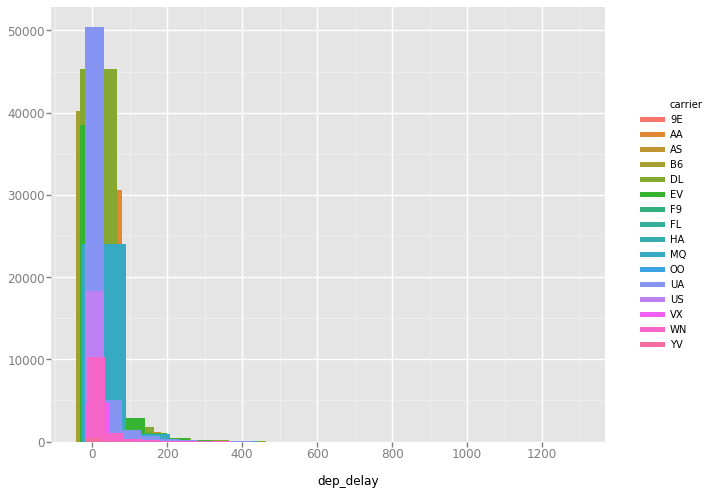

<ggplot: (-9223371917669190028)>

In [6]:
ggplot(aes(x='dep_delay', fill='carrier'), data=flights) + geom_histogram()

b. Using matplotlib

In [34]:
import matplotlib as plt
%matplotlib inline

# Create a list for carrier names
list_carrier = flights.carrier.unique()
np.count_nonzero(list_carrier)

16

In [38]:
# There are 16 carriers so we can build a 4x4 graph

plt.figure(figsize=(30,20))    
for i, carrier in enumerate(list_carrier):
    plt.subplot(4, 4, i + 1)
    plt.hist(flights[flights.carrier == carrier].dep_delay)
    plt.title(carrier)

TypeError: 'module' object is not callable

c. Which airline is the best in terms of on time departure?

1). Measure on time departure by average minute in delaying

In [9]:
flights.groupby('carrier')['dep_delay'].mean().sort_values(ascending=True)

carrier
US     3.782418
HA     4.900585
AS     5.804775
AA     8.586016
DL     9.264505
MQ    10.552041
UA    12.106073
OO    12.586207
VX    12.869421
B6    13.022522
9E    16.725769
WN    17.711744
FL    18.726075
YV    18.996330
EV    19.955390
F9    20.215543
Name: dep_delay, dtype: float64

2). Measure on time departure by percentage of non-delays

In [10]:
delay = pd.DataFrame(flights, columns=['carrier','dep_delay'])
delay.head()

,carrier,dep_delay
1,UA,2.0
2,UA,4.0
3,AA,2.0
4,B6,-1.0
5,DL,-6.0


In [11]:
# Step 1 - Group data by carrier

total_group = delay.groupby(['carrier']).count()

# Step 2 - Subset non-delay flights

nodelay_group = delay[delay['dep_delay'] <= 0].groupby('carrier').count()
nodelay_group = nodelay_group.rename(index=str, columns={'carrier':'carrier', 'dep_delay':'nodelay'})

# Step 3 - Join the two grouped data sets to calculate percentage

joined_group = total_group.join(nodelay_group, on='carrier')
joined_group['percentage'] = joined_group['nodelay']/joined_group['dep_delay']

# Result of percentage of no delay or departuring ahead of schedule. 
joined_group.sort_values(by='percentage', ascending=True)

,dep_delay,nodelay,percentage
carrier,,,
WN,12083,5525,0.457254
FL,3187,1533,0.481017
F9,682,341,0.500000
UA,57979,30718,0.529813
EV,51356,28217,0.549439
VX,5131,2906,0.566361
YV,545,312,0.572477
9E,17416,10353,0.594453
B6,54169,32724,0.604109


# iii. Create a dataframe containing means and standard deviations of inter-arrival times for the top 10 busiest airports  

In [12]:
# check the values
flights.count()

year              336776
month             336776
day               336776
dep_time          328521
sched_dep_time    336776
dep_delay         328521
arr_time          328063
sched_arr_time    336776
arr_delay         327346
carrier           336776
flight            336776
tailnum           334264
origin            336776
dest              336776
air_time          327346
distance          336776
hour              336776
minute            336776
time_hour         336776
dtype: int64

In [13]:
# Step 1 - Create dataframe for arrival flights per destination airport

top10 = flights.loc[:,['dest','year']].groupby('dest').count()
top10_ranked = top10.sort_values(by='year', ascending=False).head(10)

# Create a list for top 10 airports

top10_ap = list(top10_ranked.index)
top10_ap

['ORD', 'ATL', 'LAX', 'BOS', 'MCO', 'CLT', 'SFO', 'FLL', 'MIA', 'DCA']

In [14]:
# Step 2 - Calculate average flights per airport per day
# Check time data

flights['year'].unique()

array([2013], dtype=int64)

In [15]:
# There's data for only one year
# So for inter-arrival time, we calculate average arrival using 365 as denominator
# Get top 10 airports

top10_ranked['avg_daily'] = top10_ranked.year.apply(lambda x:x/365)
top10_ranked

,year,avg_daily
dest,,
ORD,17283,47.350685
ATL,17215,47.164384
LAX,16174,44.312329
BOS,15508,42.487671
MCO,14082,38.580822
CLT,14064,38.531507
SFO,13331,36.523288
FLL,12055,33.027397
MIA,11728,32.131507


In [16]:
# Step 3 - To calculate mean of inter-arrival time, we need arrival for each day 
# and for each airport

structure = flights[flights.dest.isin(top10_ap)].groupby(['dest','year','month','day'])

# Calculate inter-arrival time by dividing total minutes per day by total flights landed

inter_arr = structure.apply(lambda x: 24*60/x.count())['year'] # result shows inter arrival time in minutes

In [17]:
# Step 4 - Calculate mean and standard deviation of inter arrival time for each airport

top10_ranked['mean'] = inter_arr.groupby('dest').mean()
top10_ranked['std'] = inter_arr.groupby('dest').std()

# Check result
top10_ranked

,year,avg_daily,mean,std
dest,,,,
ORD,17283,47.350685,31.864393,8.037862
ATL,17215,47.164384,31.014863,4.248234
LAX,16174,44.312329,33.004458,4.308081
BOS,15508,42.487671,35.985255,10.036623
MCO,14082,38.580822,37.557588,3.053141
CLT,14064,38.531507,37.827613,4.299194
SFO,13331,36.523288,40.649739,7.663402
FLL,12055,33.027397,44.405708,5.967608
MIA,11728,32.131507,44.972533,2.704768


In [18]:
# Step 5 - Join airport names to the new dataframe

airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
1,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
2,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
3,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
4,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
5,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [19]:
# We can see faa in airports is the airport code column 
# Join top10_ranked with airport names

top10_full = pd.merge(top10_ranked, airports[['faa', 'name']], left_on='dest',right_on='faa',how='left')
top10_full

,year,avg_daily,mean,std,faa,name
0,17283,47.350685,31.864393,8.037862,ORD,Chicago Ohare Intl
1,17215,47.164384,31.014863,4.248234,ATL,Hartsfield Jackson Atlanta Intl
2,16174,44.312329,33.004458,4.308081,LAX,Los Angeles Intl
3,15508,42.487671,35.985255,10.036623,BOS,General Edward Lawrence Logan Intl
4,14082,38.580822,37.557588,3.053141,MCO,Orlando Intl
5,14064,38.531507,37.827613,4.299194,CLT,Charlotte Douglas Intl
6,13331,36.523288,40.649739,7.663402,SFO,San Francisco Intl
7,12055,33.027397,44.405708,5.967608,FLL,Fort Lauderdale Hollywood Intl
8,11728,32.131507,44.972533,2.704768,MIA,Miami Intl
9,9705,26.589041,58.961304,20.979369,DCA,Ronald Reagan Washington Natl


In [20]:
# Step 6 - Oraganize dataset
# Final result only needs: full name, daily average, mean, and standard deviation

top10_full = top10_full.drop(columns=['year','faa'])

# Order the data frame

top10_full = top10_full[['name', 'avg_daily','mean', 'std']]
top10_full

,name,avg_daily,mean,std
0,Chicago Ohare Intl,47.350685,31.864393,8.037862
1,Hartsfield Jackson Atlanta Intl,47.164384,31.014863,4.248234
2,Los Angeles Intl,44.312329,33.004458,4.308081
3,General Edward Lawrence Logan Intl,42.487671,35.985255,10.036623
4,Orlando Intl,38.580822,37.557588,3.053141
5,Charlotte Douglas Intl,38.531507,37.827613,4.299194
6,San Francisco Intl,36.523288,40.649739,7.663402
7,Fort Lauderdale Hollywood Intl,33.027397,44.405708,5.967608
8,Miami Intl,32.131507,44.972533,2.704768
9,Ronald Reagan Washington Natl,26.589041,58.961304,20.979369


# iv. Provide the histogram and density plot of the inter-arrival times for the top five busiest airports in the list provided

This section uses dataframes from previous sections


In [21]:
# Step 1 - Create name list for top 5 airports

top5_df = top10_full.head(5)
top5_ap = list(top10_full.name[:5])
top5_ap

['Chicago Ohare Intl',
 'Hartsfield Jackson Atlanta Intl',
 'Los Angeles Intl',
 'General Edward Lawrence Logan Intl',
 'Orlando Intl']

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


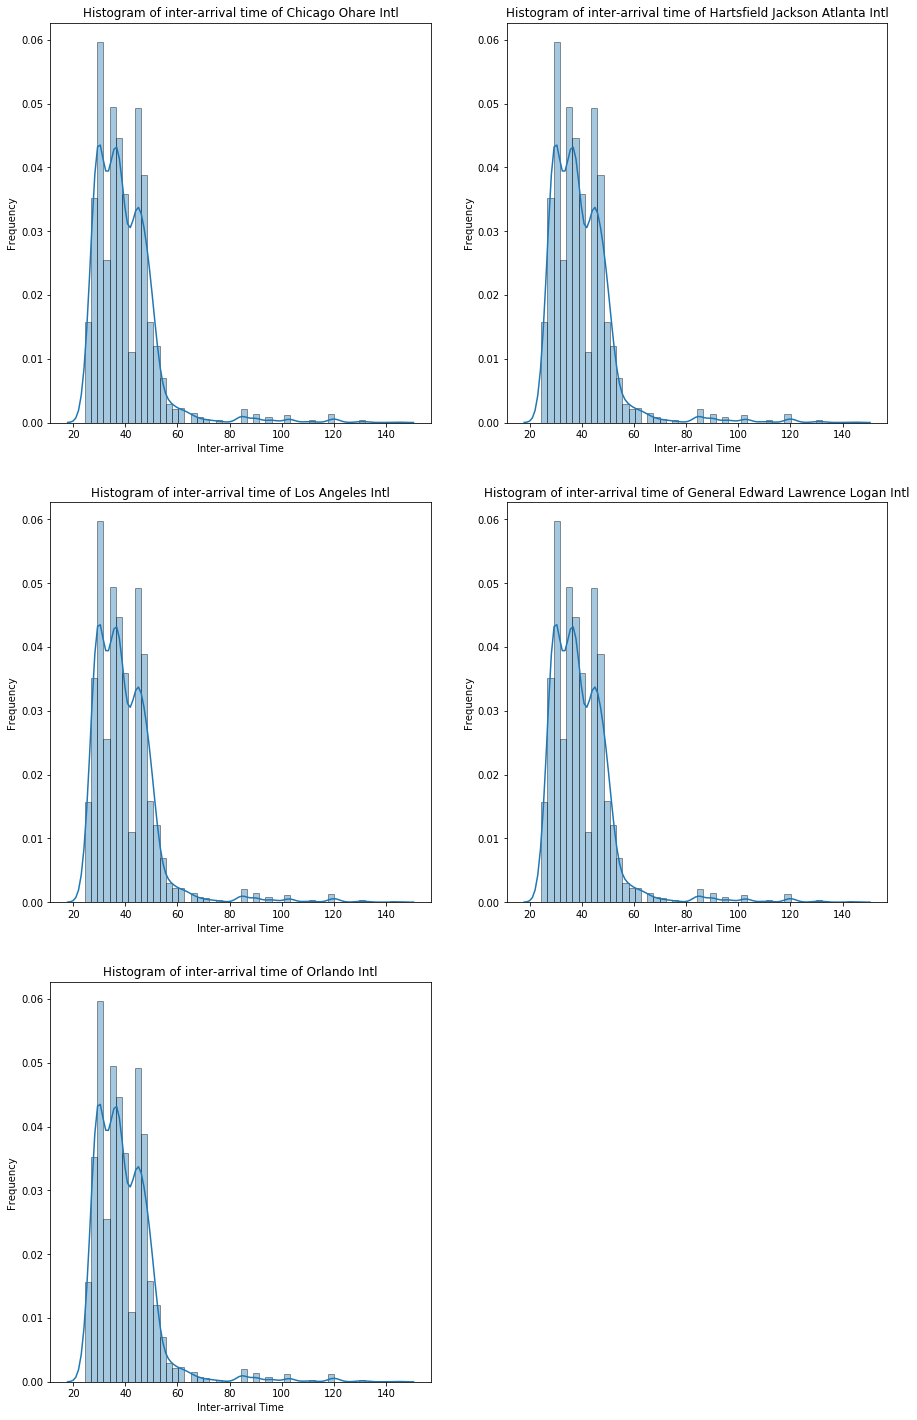

In [22]:
# Step 2 - Provide histogram and density plot

import seaborn as sns
plt.pyplot.figure(figsize=(15,25)) 

for i, ap in enumerate(top5_ap):
    
    # Create df for inter arrival times for top 5
    structure5 = flights[flights.dest == ap].groupby(['dest','year','month','day'])
    inter_arr5 = structure.apply(lambda x: 24*60/x.count())['flight'].reset_index()
    
    # Drop unused columns
    inter_arr5 = inter_arr5.drop(columns=['year','month','day'])
    
    # Plot the data
    plt.pyplot.subplot(3,2,i+1)
    sns.distplot(inter_arr5['flight'], hist=True, kde=True, hist_kws={'edgecolor':'black'})
    plt.pyplot.title('Histogram of inter-arrival time of ' + ap)
    plt.pyplot.xlabel('Inter-arrival Time')
    plt.pyplot.ylabel('Frequency')

# Part B

# i) Left join flights and weather dataset

In [23]:
df1 = pd.merge(flights, weather, how='left', on=['year', 'month', 'day', 'hour', 'origin'])
df1.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00


# ii) Select all flights that departed from JFK that were delayed in departure by more than 10 hours

In [24]:
mydelay =  df1.query ('origin == "JFK" & dep_delay>10*60')
mydelay.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,...,35.06,14.00,41.51,310.0,14.96014,NaN,0.0,1014.2,10.0,2013-01-01 18:00:00
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,...,44.96,37.04,73.59,210.0,4.60312,NaN,0.0,1029.0,8.0,2013-01-09 09:00:00


# iii) Average weather conditions for these delayed flights at the time of scheduled departure 

In [25]:
# Step 1 - Replacing all the null values by NaN to avoid errors in calculating the mean

mydelay = mydelay.fillna(np.NaN)
mydelay.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,...,35.06,14.00,41.51,310.0,14.96014,NaN,0.0,1014.2,10.0,2013-01-01 18:00:00
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,...,44.96,37.04,73.59,210.0,4.60312,NaN,0.0,1029.0,8.0,2013-01-09 09:00:00


In [26]:
# Step 2 - Group flights by scheduled deaprture time

grouped_mydelay = mydelay.groupby('sched_dep_time')
grouped_mydelay.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,...,35.06,14.00,41.51,310.0,14.96014,NaN,0.00,1014.2,10.00,2013-01-01 18:00:00
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,...,44.96,37.04,73.59,210.0,4.60312,NaN,0.00,1029.0,8.00,2013-01-09 09:00:00
78047,2013,11,24,2301.0,1225,636.0,149.0,1535,614.0,AA,...,30.02,-0.04,26.89,310.0,29.92028,40.27730,0.00,1021.4,10.00,2013-11-24 12:00:00
83242,2013,12,1,657.0,1930,687.0,1010.0,2249,681.0,DL,...,44.96,35.06,68.05,230.0,6.90468,NaN,0.00,1018.2,10.00,2013-12-01 19:00:00
95530,2013,12,14,830.0,1845,825.0,1210.0,2154,856.0,DL,...,28.04,24.08,86.07,50.0,20.71404,NaN,0.01,NaN,1.50,2013-12-14 18:00:00
124588,2013,2,16,757.0,1930,747.0,1013.0,2149,744.0,9E,...,33.98,17.96,51.47,360.0,14.96014,24.16638,0.00,1010.1,10.00,2013-02-16 19:00:00
152312,2013,3,18,1020.0,2100,800.0,1336.0,32,784.0,DL,...,33.98,30.92,88.42,80.0,18.41248,25.31716,0.07,NaN,3.00,2013-03-18 21:00:00
173992,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,DL,...,60.80,48.92,71.64,330.0,31.07106,NaN,0.11,NaN,10.00,2013-04-10 19:00:00
182284,2013,4,19,606.0,1725,761.0,923.0,2020,783.0,AA,...,57.02,53.96,89.48,180.0,25.31716,33.37262,0.00,1007.0,0.12,2013-04-19 17:00:00
182296,2013,4,19,617.0,1700,797.0,858.0,1955,783.0,AA,...,57.02,53.96,89.48,180.0,25.31716,33.37262,0.00,1007.0,0.12,2013-04-19 17:00:00


In [27]:
# Step 3 - Caluclate the mean of the required columns

avg_weather = grouped_mydelay['temp','humid','wind_speed','precip'].mean()
avg_weather

,temp,humid,wind_speed,precip
sched_dep_time,,,,
900,44.96,73.590,4.60312,0.000
1030,86.00,65.350,9.20624,0.000
1225,30.02,26.890,29.92028,0.000
1300,84.20,76.740,10.35702,0.000
1600,80.96,76.900,10.35702,0.000
1700,57.02,91.280,18.98787,0.015
1705,77.00,78.960,17.26170,0.000
1725,57.02,89.480,25.31716,0.000
1835,35.06,41.510,14.96014,0.000


# iv) Provide plots of distributions for all these weather variables.

In [28]:
# Step 1 - Calculate the minimum and maximum of these variables to decide the bin intervals

temp_min = print("Min Temperature: ", mydelay['temp'].min())
temp_max = print("Max Temperature: ", mydelay['temp'].max())
humid_min = print("Min Humidity: ", mydelay['humid'].min())
humid_max = print("Max Humidity: ", mydelay['humid'].max())
windspeed_min = print("Min Wind Speed: ", mydelay['wind_speed'].min())
windspeed_max = print("Max Wind Speed: ", mydelay['wind_speed'].max())
precip_min = print("Min Precipitation: ", mydelay['precip'].min())
precip_max = print("Max Precipitation: ", mydelay['precip'].max())

Min Temperature:  28.04
Max Temperature:  86.0
Min Humidity:  26.89
Max Humidity:  93.08
Min Wind Speed:  4.60312
Max Wind Speed:  31.07106
Min Precipitation:  0.0
Max Precipitation:  0.11


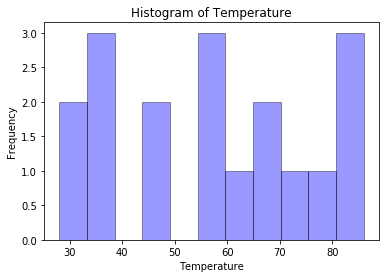

In [29]:
# Step 2- Plotting the distribution

# Plotting histogram for temperature 
# binwidth = Max temp - Min temp = 58

temp_plot = sns.distplot(mydelay['temp'], hist=True, kde=False, 
             bins=int(58/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.pyplot.title('Histogram of Temperature')
plt.pyplot.xlabel('Temperature')
plt.pyplot.ylabel('Frequency')
plt.pyplot.show()

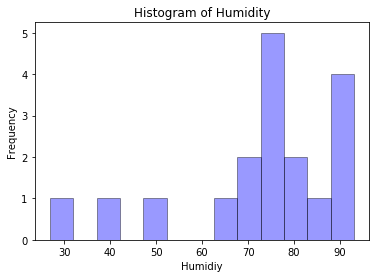

In [30]:
# Plotting histogram for humidity 
# binwidth = Max humid - Min humid = 67

humid_plot = sns.distplot(mydelay['humid'], hist=True, kde=False, 
             bins=int(67/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.pyplot.title('Histogram of Humidity')
plt.pyplot.xlabel('Humidiy')
plt.pyplot.ylabel('Frequency')
plt.pyplot.show()

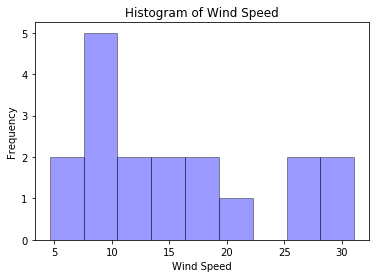

In [31]:
# Plotting histogram for wind speed 
# binwidth = Max Wind Speed - Min Wind Speed = 27

wind_plot = sns.distplot(mydelay['wind_speed'], hist=True, kde=False, 
             bins=int(27/3), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.pyplot.title('Histogram of Wind Speed')
plt.pyplot.xlabel('Wind Speed')
plt.pyplot.ylabel('Frequency')
plt.pyplot.show()

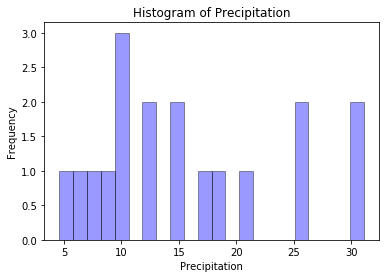

In [32]:
# Plotting histogram for precipitation
# binwidth = Max Precipitation - Min Precipitation = 0.11

precip_plot = sns.distplot(mydelay['wind_speed'], hist=True, kde=False, 
             bins=int(0.11/0.005), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.pyplot.title('Histogram of Precipitation')
plt.pyplot.xlabel('Precipitation')
plt.pyplot.ylabel('Frequency')
plt.pyplot.show()

# v) Save to mydelay.csv

In [33]:
# Creating a new csv file
mydelay.to_csv('mydelay.csv')

# vi) Is there a difference, across airlines, how arrival delay is distributed?

We first try using facet histograms.

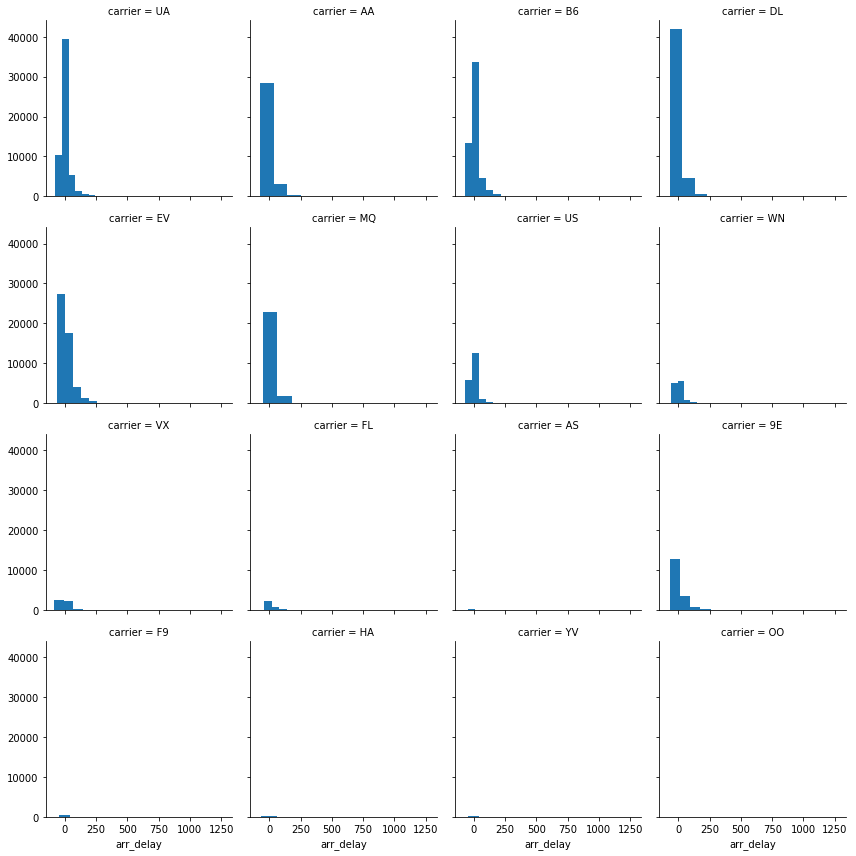

In [34]:
g = sns.FacetGrid(flights, col='carrier', col_wrap=4)
g.map(plt.pyplot.hist, 'arr_delay')

There is no obvious difference in distribution of arrival delays according to the histograms above. 

To further support the point, we use top 5 airlines as examples to analyze their distributions in one diagram.

In [35]:
# Step 1 - Get a list of top 5 airlines to plot the easy to view distribution

top_5_airlines = flights['carrier'].value_counts().sort_values(ascending=False).head(5).index
top_5_airlines

Index(['UA', 'B6', 'EV', 'DL', 'AA'], dtype='object')

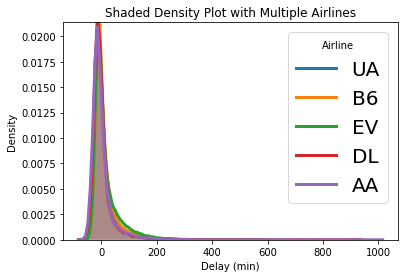

In [22]:
# Step 2 - Creating shaded density plots to see differences

import seaborn as sns

# Ignoring the warnings that might come from np array - generally because of the conversion to NaN values
np.warnings.filterwarnings('ignore')

# Creating a list of airlines that we got from Step 1
airlines = ['UA', 'B6', 'EV', 'DL', 'AA']

# Iterate through the five airlines
for airline in airlines:
    
    # Subset to the airline
    subset = flights[flights['carrier'] == airline]
    
    # Draw the density plot
    density_plot = sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = airline)
    
# Plot formatting
plt.pyplot.legend(prop={'size': 20}, title = 'Airline')
plt.pyplot.title('Shaded Density Plot with Multiple Airlines')
plt.pyplot.xlabel('Delay (min)')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

# Writing text at the bottom to describe the airlines

ax.text(0.95, 0.01, 'UA - American Airlines, B6 - JetBlue, EV - Express Jet, DL - Delta Airlines, AA - American Airlines',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='blue', fontsize=5)